<a href="https://colab.research.google.com/github/rsxss/hackathon-season2/blob/main/Dev_mountain_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dev Mountain Tech Festival Season 2**


## Befor migration

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
import plotly.express as px
from datetime import datetime

### Chart

In [60]:
data = pd.read_csv("/content/data-devclub-1.csv")
df = pd.DataFrame(data)

In [61]:
display(df)

,EMPID,PASSPORT,FIRSTNAME,LASTNAME,GENDER,BIRTHDAY,NATIONALITY,HIRED,DEPT,POSITION,STATUS,REGION
0,1,OQI75XIE4UX,Christopher,Kennedy,1,05-02-1978,South Korea,20-02-2005,Flight Planning,Steward,2,Europe
1,2,CDC87ETW8EQ,Burton,Gallegos,0,22-09-1960,Germany,29-10-2021,Aircraft Maintenance,Pilot,1,APAC
2,3,JUI65YBK7AF,Jada,Bender,0,28-05-1963,Pakistan,11-02-2001,Pilot,Pilot,1,Canada
3,4,CYB72WYU6UR,Winter,Blair,0,14-02-1993,Austria,24-03-2022,Pilot,Steward,4,Ocenia
4,5,AZE20CSG4MU,Lillian,Reese,0,03-12-1982,Ukraine,19-05-2002,Flight Planning,Steward,1,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,LJB26BQM6PS,Laith,Whitfield,0,14-01-1987,Russian Federation,09-02-2001,Pilot,Airhostess,0,APAC
96,97,SUF73DKV4QE,Dante,Hart,0,21-12-1999,Peru,22-02-2016,Pilot,Pilot,1,Europe
97,98,DOB31QXV4GZ,Moana,Walsh,1,03-05-1995,Brazil,21-04-2002,Pilot,Airhostess,3,Ocenia
98,99,OUB92IKA7AU,Jonah,Solomon,1,25-05-1985,Pakistan,30-04-2023,Flight Attendance,Pilot,3,Europe


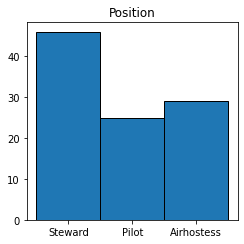

In [62]:
plt.rcParams["figure.figsize"] = [3.50, 3.50]
plt.rcParams["figure.autolayout"] = True

n, bins, patches = plt.hist(df['POSITION'], bins=3, edgecolor='black')
ticks = [(patch._x0 + patch._x1)/2 for patch in patches]
plt.xticks(ticks)
plt.title("Position")
plt.show()

OrderedDict([(0, 52), (1, 48)])


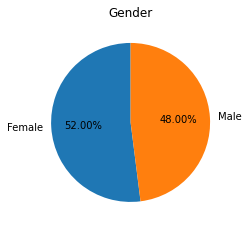

In [63]:
count = collections.Counter(df['GENDER'])
count = collections.OrderedDict(sorted(count.items()))
Value = count.values()
print(count)
Key = ["Female","Male"]

fig, ax = plt.subplots()
ax.pie(Value,labels = Key, autopct='%.2f%%', startangle=90)
plt.title("Gender")
plt.show()

Counter({'Aircraft Maintenance': 34, 'Flight Planning': 24, 'Flight Attendance': 22, 'Pilot': 20})


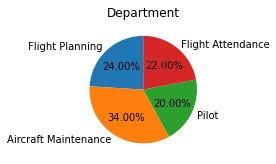

In [64]:
count_dept = collections.Counter(df['DEPT'])
Value_dept = count_dept.values()
Key_dept = count_dept.keys();
print(count_dept)

fig1, ax1 = plt.subplots()
ax1.pie(Value_dept,labels = Key_dept, autopct='%.2f%%', startangle=90)
plt.title("Department")
plt.show()

dict_values([30, 13, 19, 38])


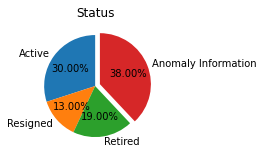

In [65]:
count_status = collections.Counter(df['STATUS'])
count_status = collections.OrderedDict(sorted(count_status.items()))
dict_status = {'0': count_status[0], '1': count_status[1], '2': count_status[2], '3': count_status[3]+count_status[4]}
Value_status = dict_status.values()

Key_status = ["Active","Resigned","Retired","Anomaly Information"]
print(Value_status)
explode = (0, 0,0,0.1)

fig2, ax2 = plt.subplots()
ax2.pie(Value_status,explode=explode,labels = Key_status, autopct='%.2f%%', startangle=90)
plt.title("Status")
plt.show()

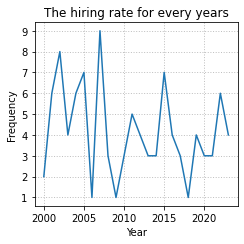

In [66]:
df_year = pd.DatetimeIndex(df['HIRED']).year
dict_year = collections.Counter(df_year)
dict_year = collections.OrderedDict(sorted(dict_year.items()))
Value_year = list(dict_year.values())
Keys_year = list(dict_year.keys())

plt.title("The hiring rate for every years")
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(color='silver', linestyle=':', linewidth=1)
plt.plot(Keys_year, Value_year)

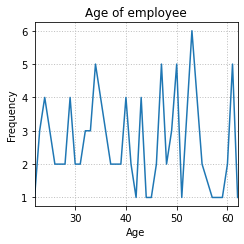

In [67]:
bd = pd.DatetimeIndex(df['BIRTHDAY']).year
dict_bd = collections.Counter(bd)
dict_bd = collections.OrderedDict(sorted(dict_bd.items()))
Value_bd = np.array(list(dict_bd.values()))
Keys_bd = np.array(list(dict_bd.keys()))
Keys_bd =[2022-x for x in Keys_bd]

plt.xlim([22, 62])
plt.title("Age of employee")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(color='silver', linestyle=':', linewidth=1)
plt.plot(Keys_bd, Value_bd)

### Map

***Please use colab to see map***

In [68]:
dict_na = pd.DataFrame(collections.Counter(df['NATIONALITY']), index=[0])

data = pd.DataFrame(dict_na).T.reset_index()
data.columns=['country', 'count']

print(data)

               country  count
0          South Korea      2
1              Germany      4
2             Pakistan      4
3              Austria      5
4              Ukraine      2
5               Norway      2
6               Mexico      5
7        United States      4
8               Sweden      5
9          Philippines      5
10             Vietnam      6
11         Netherlands      4
12          Costa Rica      5
13               India      3
14            Colombia      2
15        South Africa      3
16  Russian Federation      3
17      United Kingdom      3
18               China      2
19           Indonesia      3
20               Italy      4
21                Peru      6
22             Ireland      2
23              Turkey      3
24              Brazil      3
25               Spain      1
26           Australia      2
27           Singapore      3
28             Belgium      1
29         New Zealand      1
30             Nigeria      1
31              France      1


In [69]:
database = px.data.gapminder().query('year == 2007')

df_na = pd.merge(database, data, how='inner', on='country')


fig = px.choropleth(df_na,
                    locations="country",
                    locationmode="country names",
                    color="count",
                    color_continuous_scale=px.colors.sequential.Purp,
                    projection="natural earth"
)

fig.update_layout(
    title_text = 'Employee Nationality',
    geo=dict(
        showcoastlines=False,
        )
)

fig.show()

## After migration

### Chart

In [70]:
data_result = pd.read_csv("/content/data-devclub-1_result.csv")
df_result = pd.DataFrame(data_result)

In [71]:
display(df_result)

,EMPID,PASSPORT,FIRSTNAME,LASTNAME,GENDER,BIRTHDAY,NATIONALITY,HIRED,DEPT,POSITION,STATUS,REGION
0,3,JUI65YBK7AF,Jada,Bender,0,28-05-1963,Pakistan,11-02-2001,Pilot,Pilot,1,Canada
1,5,AZE20CSG4MU,Lillian,Reese,0,03-12-1982,Ukraine,19-05-2002,Flight Planning,Steward,1,Canada
2,23,NFH65BYM0VB,Armand,Horn,0,24-05-1987,Netherlands,19-06-2007,Aircraft Maintenance,Airhostess,1,Ocenia
3,29,CMK62UAD3VK,Rowan,Leonard,1,15-07-1974,Germany,27-03-2004,Aircraft Maintenance,Pilot,1,Ocenia
4,33,EWD45RJW5YK,Carter,Velasquez,0,23-11-1967,Indonesia,27-02-2005,Flight Planning,Pilot,1,APAC
5,34,BFS82MEY3CX,Selma,Bush,0,26-03-1972,Italy,10-10-2008,Flight Attendance,Airhostess,1,USA
6,50,MRC33GHJ2KW,Calvin,Roach,1,16-04-1999,Mexico,18-03-2011,Flight Attendance,Steward,1,Europe
7,66,WKV12UQC6QF,Zachery,Valentine,0,04-06-1971,Philippines,25-08-2011,Flight Attendance,Steward,1,Middle East
8,80,EUC74ENE9ZK,Ryan,Rush,0,13-06-1998,Italy,31-07-2019,Aircraft Maintenance,Pilot,1,Middle East
9,93,UXL43IOW6OV,Honorato,Maxwell,1,09-03-1982,France,04-02-2017,Aircraft Maintenance,Airhostess,1,Europe


In [72]:
data = pd.read_csv("/content/data-devclub-1.csv")
df = pd.DataFrame(data)

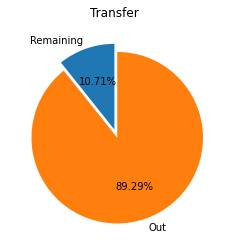

In [73]:
x = [len(df_result),len(df)]
y = ["Remaining","Out"]

fig, ax = plt.subplots()
explode = (0, 0.1)
ax.pie(x,labels = y,explode=explode, autopct='%.2f%%', startangle=90)

plt.title("Transfer")
plt.show()

OrderedDict([(0, 8), (1, 4)])


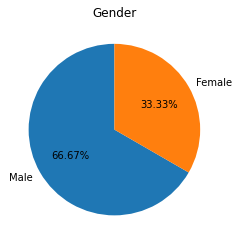

In [74]:
count = collections.Counter(df_result['GENDER'])
count = collections.OrderedDict(sorted(count.items()))

Value = count.values()

print(count)
Key = ["Male","Female"]

fig, ax = plt.subplots()
ax.pie(Value,labels = Key, autopct='%.2f%%', startangle=90)
plt.title("Gender")
plt.show()

### Map

***Please use colab to see map***

In [75]:
dict_na_result = pd.DataFrame(collections.Counter(df_result['NATIONALITY']), index=[0])

data_result = pd.DataFrame(dict_na_result).T.reset_index()
data_result.columns=['country', 'count']

print(data_result)

        country  count
0      Pakistan      1
1       Ukraine      1
2   Netherlands      1
3       Germany      1
4     Indonesia      1
5         Italy      2
6        Mexico      1
7   Philippines      1
8        France      1
9     Singapore      1
10         Peru      1


In [76]:
database = px.data.gapminder().query('year == 2007')

df_na_result = pd.merge(database, data_result, how='inner', on='country')


fig = px.choropleth(df_na_result,
                    locations="country",
                    locationmode="country names",
                    color="count",
                    color_continuous_scale=px.colors.sequential.Purp,
                    projection="natural earth"
)

fig.update_layout(
    title_text = 'Remaining Employee Nationality',
    geo=dict( showcoastlines=False )
)

fig.show()